In [74]:
import pandas as pd
import numpy as np
import hvplot.pandas  # noqa
import matplotlib.pyplot as plt
import logging
import copy
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

import lab_tools
import pickle
logging.basicConfig(level=logging.INFO)
import math
from scipy.constants import mu_0 as mu_0

In [55]:
path = r'C:\Users\noach\OneDrive\Documents\GitHub\Lab-B\magnetisem\extension2\first'
path2 = r'C:\Users\noach\OneDrive\Documents\GitHub\Lab-B\magnetisem\extension2\second'
path3 = r'C:\Users\noach\OneDrive\Documents\GitHub\Lab-B\magnetisem\extension2\3'
path4 = r'C:\Users\noach\OneDrive\Documents\GitHub\Lab-B\magnetisem\extension2\high_freq'
path5 = r'C:\Users\noach\OneDrive\Documents\GitHub\Lab-B\magnetisem\extension2\all'
path6 = r'C:\Users\noach\OneDrive\Documents\GitHub\Lab-B\magnetisem\extension2\high_freq_week2'

#d = lab_tools.read_to_dict(path)
d1 = lab_tools.read_to_dict(path)
d2 = lab_tools.read_to_dict(path2)
d3 = lab_tools.read_to_dict(path3)
d4 = lab_tools.read_to_dict(path4)
d6 = lab_tools.read_to_dict(path6)


dict_names1 = [d1,d2,d3]
dict_names2 = [d4,d6]
mod_data = {}

for name in dict_names1:
    for key in name.keys():
        mod_data[key] = name[key]
        for index in range(len(mod_data[key]['x'])):
           mod_data[key]['x'][index] = mod_data[key]['x'][index]/10
        for index in range(len(mod_data[key]['y'])):
            mod_data[key]['y'][index] = mod_data[key]['y'][index]/10

for key in d4.keys():
    mod_data[key] = d4[key]

# for key in d6.keys():
#     mod_data[key] = d6[key]
#     ney_y = d6[key]['x']
#     ney_x = d6[key]['y']
#     mod_data[key]['y'] = ney_y
#     mod_data[key]['x'] = ney_x

# d = lab_tools.read_to_dict(path5)

In [64]:
impedance = []
imp_freq = []
R = 19

for x in mod_data.keys():
    amp1 = abs((max(mod_data[x]['y'])-min(mod_data[x]['y'])))
    amp2 = abs((max(mod_data[x]['x'])-min(mod_data[x]['x'])))
    imp_freq.append(int(x))
    impedance.append(R*(amp1/amp2))

# for x in d6.keys():
#     amp1 = abs((max(d6[x]['y'])-min(d6[x]['y'])))
#     amp2 = abs((max(d6[x]['x'])-min(d6[x]['x'])))
#     imp_freq.append(int(x))
#     impedance.append(70*R*(amp1/amp2))

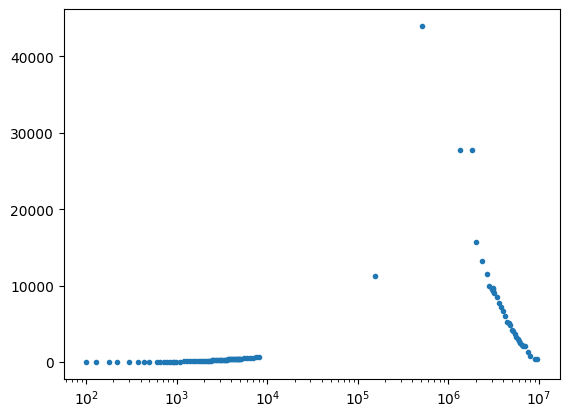

In [65]:
plt.semilogx(imp_freq, impedance, '.')

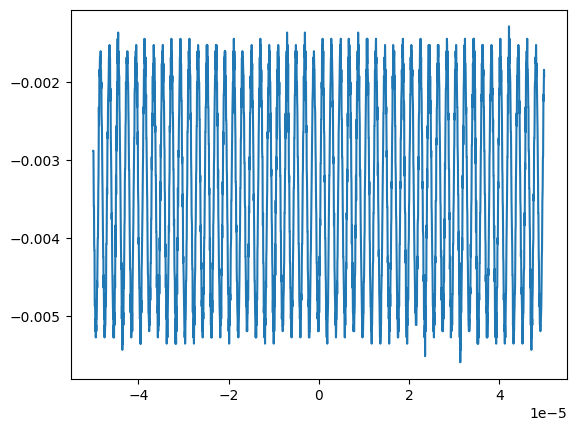

In [68]:
plt.plot(mod_data['507517']['t'],mod_data['507517']['x'])

In [66]:
logging.basicConfig(level=logging.WARNING)

phases = []
frequencies = []
amplitudes = []
faild_fits = {}

def find_phase(w,a1,p1,c1,a2,p2,c2):
    f = 2 * np.pi / w
    return f * np.abs(p1 - p2)

def find_z(w,a1,p1,c1,a2,p2,c2):
    return a2 / a1

funcs = {'phase': find_phase, 'z': find_z}
limits = {'z': [0, 10000]}


for freq, df in copy.deepcopy(mod_data).items():
    float_freq = float(freq)
    logging.info(f"frequency is {freq}")
    result = lab_tools.extract_data_from_fit(funcs, df, float_freq, display=False)

    if result:
        frequencies.append(float(freq))
        phases.append(result['phase'])
        amplitudes.append(result['z'])

    else:
        faild_fits[freq] = df
        del mod_data[freq]


fit failed for frequency 100.0


fit failed for frequency 130.0


fit failed for frequency 180.0


fit failed for frequency 1836600.0


fit failed for frequency 7016600.0


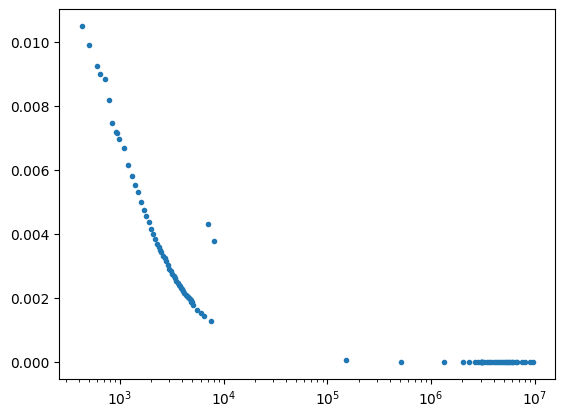

In [67]:
plt.semilogx(frequencies, phases, '.')


In [73]:
R_effective = []
L_effective = []

for index in range(len(amplitudes)):
    R_effective.append(amplitudes[index]*math.cos(phases[index]) - R)
    L_effective.append(amplitudes[index]*math.sin(phases[index])/(2*math.pi))


In [82]:
N = 50
Real_mu = []
Im_mu = []

for index in range(len(R_effective)):
    Real_mu.append(R_effective[index]/(mu_0*frequencies[index]*(N**2)))
    Im_mu.append(R_effective[index]/(mu_0*frequencies[index]*(N**2)))


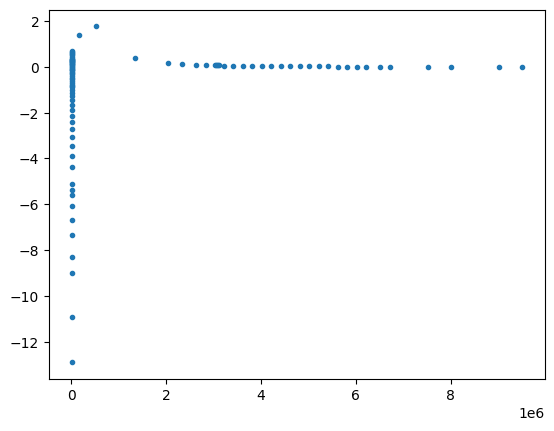

In [83]:
plt.ticklabel_format(style='scientific')
plt.plot(frequencies,Im_mu,'.')
